# Loop Fitting Tutorial
We start with the setup/import statements that we will need. Note that we've set the logging level to INFO. This can be
changed to see more or less of the code's logging messages.

In [1]:
import logging
import matplotlib
import mkidcalculator as mc
import matplotlib.pyplot as plt

%matplotlib inline
logging.basicConfig(level=logging.INFO)

To load in the data, we note that it is in the old Caltech Matlab format, so the ```legacy_sweep``` data function must be
used.

In [2]:
directory = '/Volumes/data/Paul/PtSi_MKIDs/Data/PtSi/20160219/ps2/'
file_name = 'sweep_config_20160219180719.mat'
sweep = mc.Sweep.from_file(directory + file_name, data=mc.io.legacy_sweep)

Let's just fit one resonator from the data set and use all of the guess methods. We are also going to fit for the IQ
mixer imbalance because it wasn't measured for this dataset. 

This step can take a while, but information about the fits will be
printed to the screen via the logging module.

In [3]:
mc.experiments.multiple_fit(sweep.resonators[3], guess_kwargs={'fit_imbalance': True});

INFO:mkidcalculator.experiments.loop_fitting:starting <function basic_fit at 0x1c18c65950>
INFO:mkidcalculator.experiments.loop_fitting:loop 120785067144 fit: label = 'basic_fit', reduced chi squared = 3.32054
INFO:mkidcalculator.experiments.loop_fitting:loop 120785042120 fit: label = 'basic_fit', reduced chi squared = 12.8393
INFO:mkidcalculator.experiments.loop_fitting:loop 120785039656 fit: label = 'basic_fit', reduced chi squared = 2209.41
INFO:mkidcalculator.experiments.loop_fitting:loop 120785067088 fit: label = 'basic_fit', reduced chi squared = 3603.23
INFO:mkidcalculator.experiments.loop_fitting:starting iteration: 0
INFO:mkidcalculator.experiments.loop_fitting:starting <function temperature_fit at 0x1c18c65a60>
INFO:mkidcalculator.experiments.loop_fitting:starting <function power_fit at 0x1c18c659d8>
INFO:mkidcalculator.experiments.loop_fitting:loop 120785067144 fit: label = 'power_fit0_0', reduced chi squared = 3.4471
INFO:mkidcalculator.experiments.loop_fitting:loop 1207850

Now that we have fit all of the data, we can plot the loop fits individually.

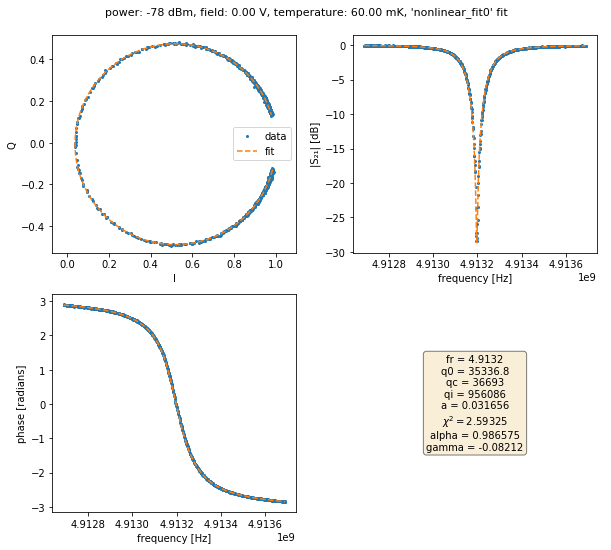

In [4]:
sweep.resonators[3].loops[0].plot(
    plot_fit=True, calibrate=True, 
    fit_parameters=("fr", "q0", "qc", "qi", "a", "chi2", "alpha", "gamma")
);

Or, all of the loops in a resonator can be plotted at once.

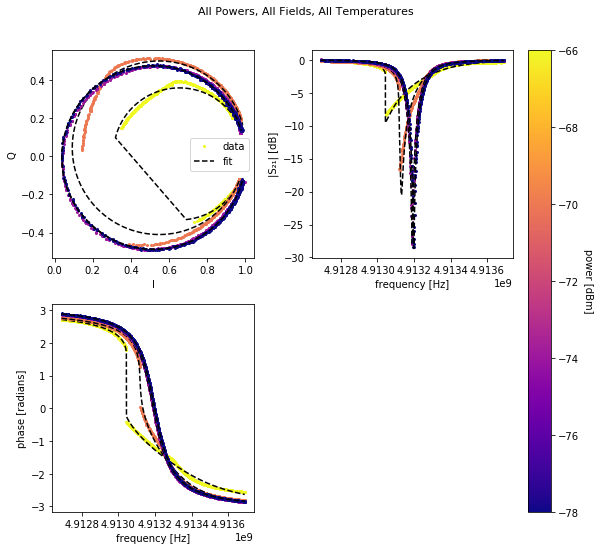

In [5]:
sweep.resonators[3].plot_loops(plot_fit=True, calibrate=True, color_data='power');

From this plot it is easier to see how the model breaks down at higher probe tone powers.